In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Uploading The Datasets

In [2]:
matches=pd.read_csv(r'C:\Users\iamda\OneDrive\Desktop\jupyter\project\only datasets here\archive (3)\matches.csv')

In [3]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [5]:
matches['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [6]:
deliviery=pd.read_csv(r'C:\Users\iamda\OneDrive\Desktop\jupyter\project\only datasets here\archive (3)\deliveries.csv')

In [7]:
deliviery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
delv=deliviery[['match_id','inning','batting_team','bowling_team']]

In [9]:
total=deliviery.groupby(['match_id','inning'])['total_runs'].sum().reset_index()

In [10]:
total.head()

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183


In [11]:
score=total[total['inning']==1]

In [12]:
#score.drop(['inning'],axis=1,inplace=True)

In [13]:
score.head()

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157


In [14]:
match_df=matches.merge(score[['match_id','total_runs']],left_on='id',right_on='match_id')

In [15]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157


## Here I'll Cleaning the datasets

In [16]:
match_df.duplicated().sum()

0

## Removing the old team

In [17]:
match_df['team1']=match_df['team1'].replace('Delhi Daredevils','Delhi Capitals')

In [18]:
match_df['team1']=match_df['team1'].replace('Deccan Chargers','Sunrisers Hyderabad')

In [19]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [20]:
team=[

        

        'Sunrisers Hyderabad',
        'Mumbai Indians', 
        'Gujarat Lions',
       'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 
        'Kings XI Punjab',
       'Chennai Super Kings',
        'Rajasthan Royals', 
       'Delhi Capitals'

    
]

In [21]:
match_df=match_df[match_df['team1'].isin(team)]
match_df=match_df[match_df['team2'].isin(team)]

In [22]:
deliviery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [23]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN,6,135
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148


In [24]:
match_df['dl_applied'].unique()

array([0, 1], dtype=int64)

In [25]:
match_df=match_df[match_df['dl_applied']==0]

In [26]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [27]:
df3=match_df.merge(deliviery,on='match_id')

In [28]:
df3.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [29]:
df3=df3[df3['inning']==2]

In [30]:
df3['current_score']=df3.groupby('match_id')['total_runs_y'].cumsum()

In [31]:
df3['runs_left']=df3['total_runs_x']-df3['current_score']

In [32]:
df3['ball_left']=126-(df3['over']*6+df3['ball'])

In [33]:
df3['player_dismissed']=df3['player_dismissed'].fillna(0)

In [34]:
df3['player_dismissed']=df3['player_dismissed'].apply(lambda x:x if x==0 else 1 )


In [35]:
df3['player_dismissed']=df3['player_dismissed'].astype(int)


In [36]:
wicket=df3.groupby('match_id')['player_dismissed'].cumsum().values
df3['wicket_left']=10-wicket


In [37]:
df3['wicket_left']

125       10
126       10
127       10
128       10
129       10
          ..
128493     5
128494     5
128495     4
128496     4
128497     3
Name: wicket_left, Length: 62217, dtype: int32

In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62217 entries, 125 to 128497
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          62217 non-null  int64 
 1   city              61628 non-null  object
 2   winner            62190 non-null  object
 3   total_runs_x      62217 non-null  int64 
 4   inning            62217 non-null  int64 
 5   batting_team      62217 non-null  object
 6   bowling_team      62217 non-null  object
 7   over              62217 non-null  int64 
 8   ball              62217 non-null  int64 
 9   batsman           62217 non-null  object
 10  non_striker       62217 non-null  object
 11  bowler            62217 non-null  object
 12  is_super_over     62217 non-null  int64 
 13  wide_runs         62217 non-null  int64 
 14  bye_runs          62217 non-null  int64 
 15  legbye_runs       62217 non-null  int64 
 16  noball_runs       62217 non-null  int64 
 17  penalty_runs  

In [39]:
## Current run rate
df3['current_run_rate']=df3['current_score']*6/(120-df3['ball_left'])

In [40]:
## Require run rate
df3['req_run_rate']=(df3['runs_left']*6)/df3['ball_left']

In [41]:
df3.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,ball_left,wicket_left,current_run_rate,req_run_rate
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.0,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.0,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,10,2.0,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,10,4.5,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,10,8.4,10.434783


In [42]:
df3['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Kings XI Punjab',
       'Gujarat Lions', 'Rajasthan Royals', 'Chennai Super Kings',
       'Delhi Capitals'], dtype=object)

In [43]:
def convertor_in_result(df):
    if df['batting_team']==df['winner']:
        return 1
    else:
        return 0
df3['result']=df3.apply(convertor_in_result,axis=1)  

In [44]:
df4=df3[['city','batting_team','bowling_team','total_runs_x','runs_left','ball_left','wicket_left','current_run_rate','req_run_rate','result']]

In [45]:
df4.head()

,city,batting_team,bowling_team,total_runs_x,runs_left,ball_left,wicket_left,current_run_rate,req_run_rate,result
125,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,207,206,119,10,6.0,10.386555,0
126,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,207,206,118,10,3.0,10.474576,0
127,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,207,206,117,10,2.0,10.564103,0
128,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,207,204,116,10,4.5,10.551724,0
129,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,207,200,115,10,8.4,10.434783,0


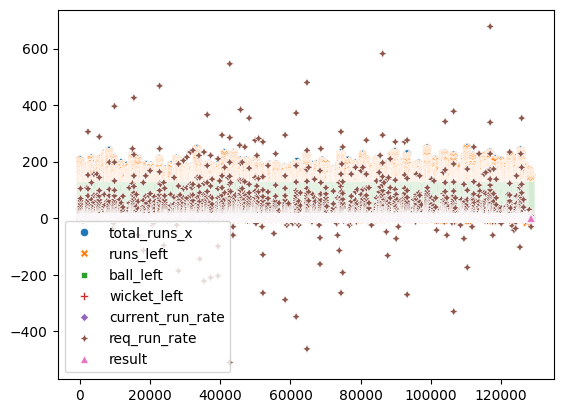

In [46]:
sns.scatterplot(df4)
plt.show()

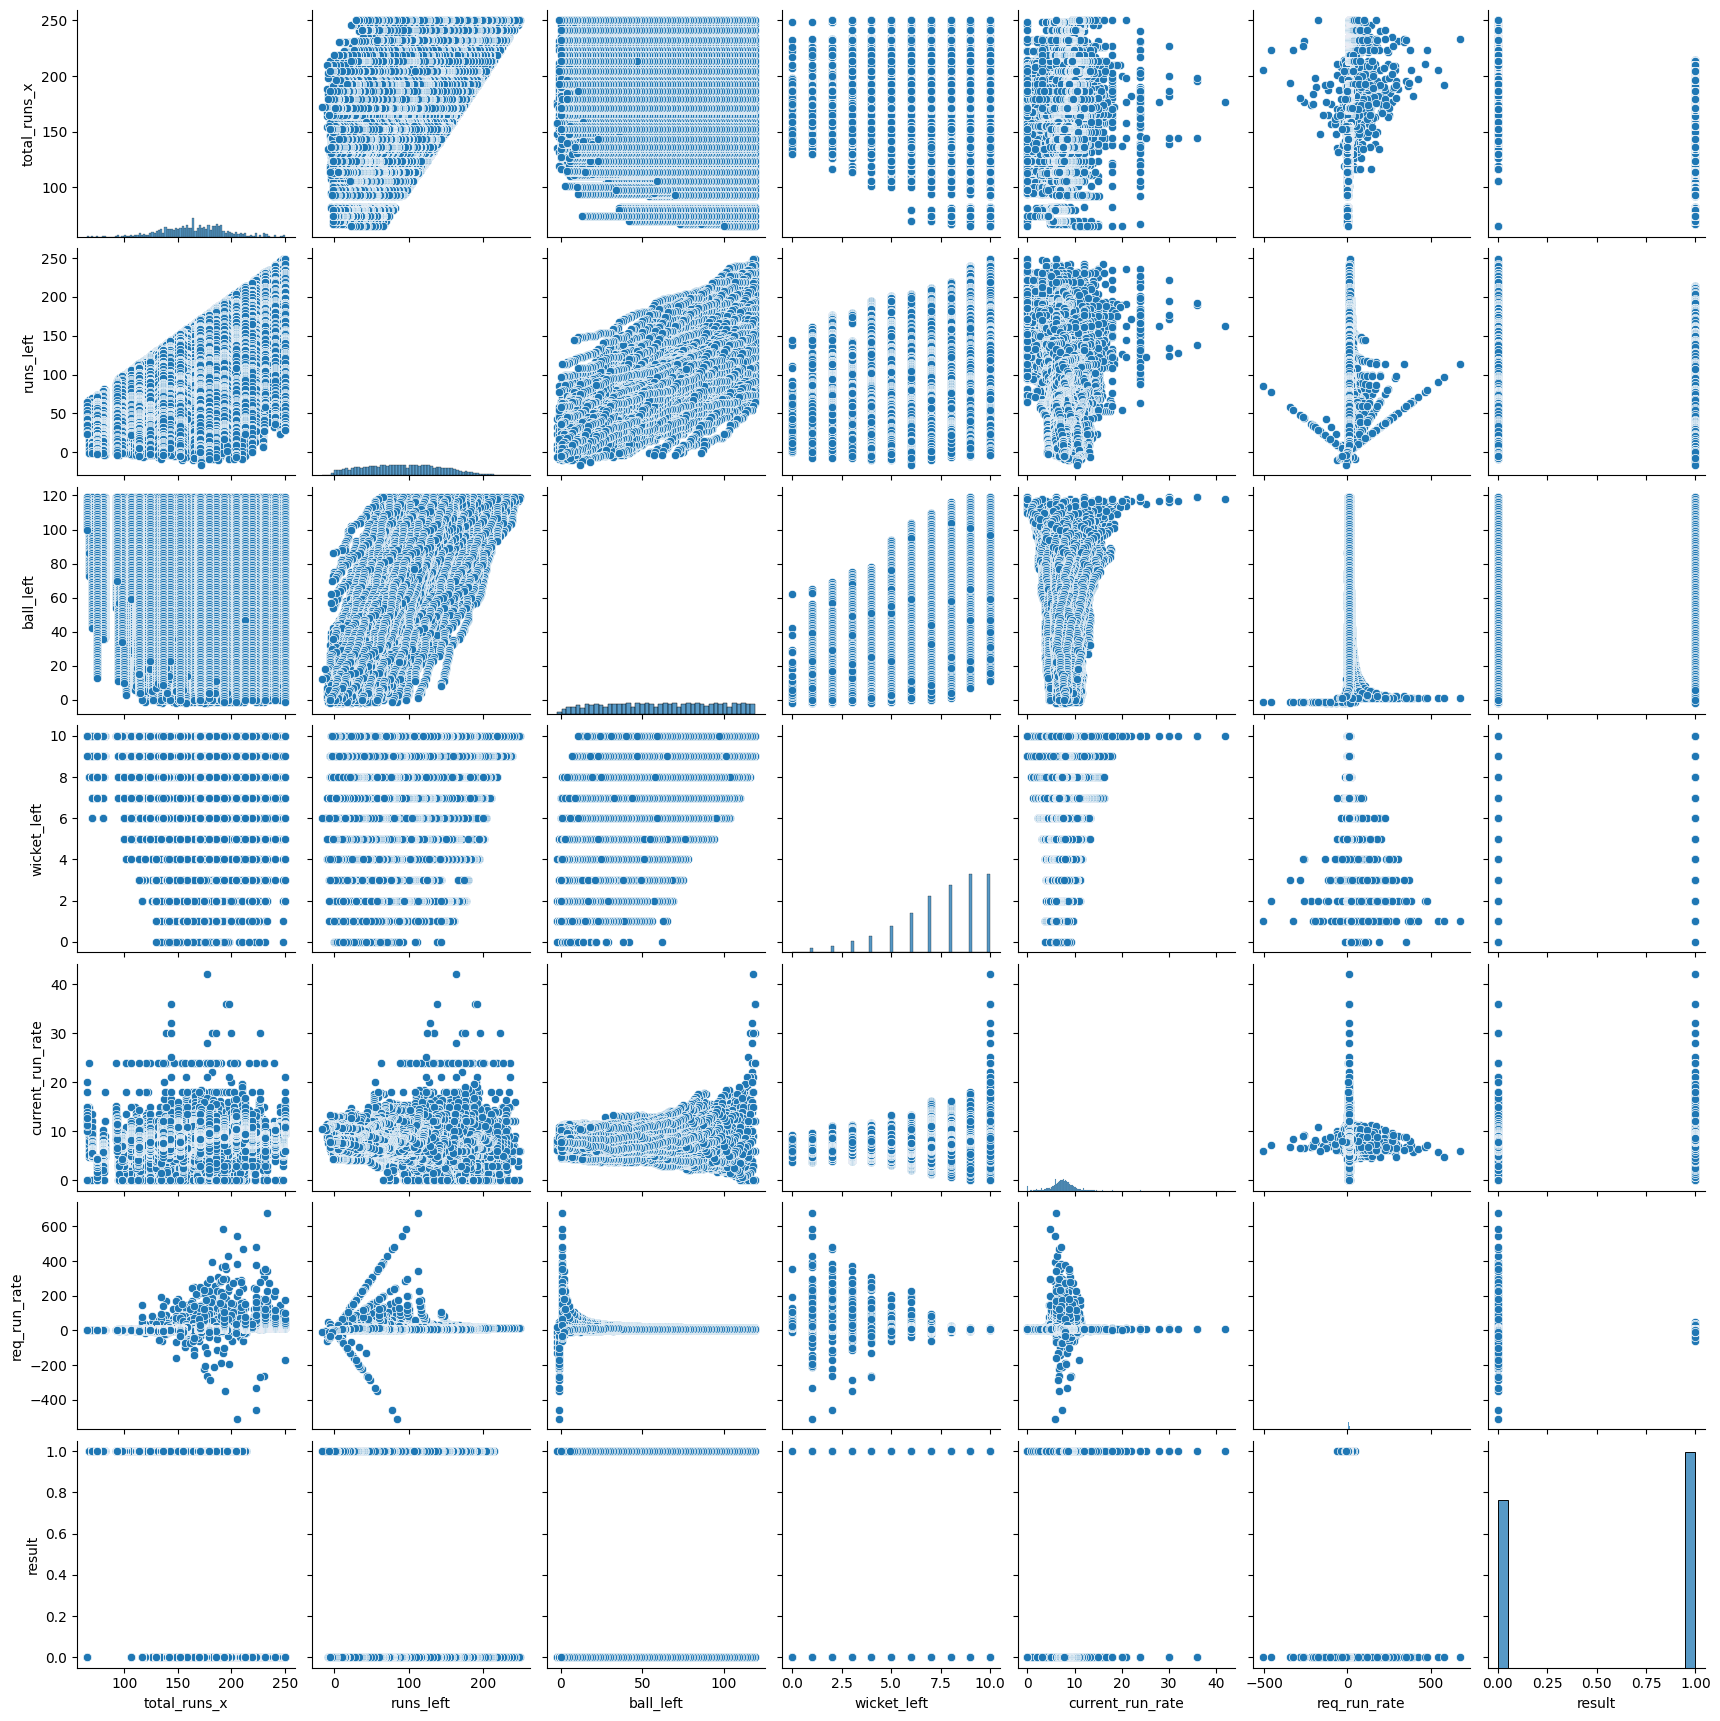

In [47]:
sns.pairplot(df4)

In [48]:
final_df=df4.sample(df4.shape[0])

In [49]:
final_df.head()

,city,batting_team,bowling_team,total_runs_x,runs_left,ball_left,wicket_left,current_run_rate,req_run_rate,result
124067,Chennai,Chennai Super Kings,Sunrisers Hyderabad,179,67,47,8,9.205479,8.553191,1
70257,NaN,Rajasthan Royals,Chennai Super Kings,140,102,85,8,6.514286,7.200000,0
81500,Chennai,Sunrisers Hyderabad,Chennai Super Kings,209,194,108,10,7.500000,10.777778,0
127483,Mumbai,Mumbai Indians,Kolkata Knight Riders,143,65,60,9,7.800000,6.500000,1
121385,Hyderabad,Sunrisers Hyderabad,Delhi Capitals,164,116,79,10,7.024390,8.810127,0


In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as  xgb
from sklearn.compose import ColumnTransformer

In [51]:
final_df.describe()

,total_runs_x,runs_left,ball_left,wicket_left,current_run_rate,req_run_rate,result
count,62217.000000,62217.000000,62217.000000,62217.000000,62217.000000,6.220900e+04,62217.000000
mean,165.896765,92.205233,62.659241,7.561438,7.467209,NaN,0.562740
std,29.943921,50.455164,33.390275,2.134589,2.298335,NaN,0.496052
min,65.000000,-16.000000,-2.000000,0.000000,0.000000,-inf,0.000000
25%,146.000000,52.000000,35.000000,6.000000,6.247423,7.064516e+00,0.000000
50%,165.000000,91.000000,63.000000,8.000000,7.500000,8.831461e+00,1.000000
75%,186.000000,130.000000,92.000000,9.000000,8.754098,1.085393e+01,1.000000
max,250.000000,249.000000,119.000000,10.000000,42.000000,inf,1.000000


In [52]:
final_df=final_df[final_df['ball_left']!=0]

In [53]:
final_df.dropna(inplace=True)

## Now Start to buliding the Model

In [54]:
x=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [55]:
trf=ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['city','batting_team','bowling_team'])
    
]
,remainder='passthrough')

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 

## LogisticRegression()

In [57]:
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression())
])

In [58]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['city', 'batting_team',
                                                   'bowling_team'])])),
                ('step2', LogisticRegression())])

In [61]:
pipe_pred=pipe.predict(x_test)
print('LogisticRegression',accuracy_score(y_test,pipe_pred))

LogisticRegression 0.804671604134451


In [60]:
score=cross_val_score(pipe,x_train,y_train,scoring='accuracy',cv=5)
print(np.round(np.mean(score),2))

0.8


## RandomForestClassifier()

In [64]:
trf=ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['city','batting_team','bowling_team'])
    
]
,remainder='passthrough')

pipe_random=Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])
pipe_random.fit(x_train,y_train)

pipe_pred=pipe_random.predict(x_test)
print('RandomForestClassifier',accuracy_score(y_test,pipe_pred))

## Cross Val Score
score=cross_val_score(pipe_random,x_train,y_train,scoring='accuracy',cv=5)
print('Cross_val_score',np.round(np.mean(score),2))

RandomForestClassifier 0.9986978106942297
Cross_val_score 1.0


In [65]:
match_df.head()

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
2,3,Rajkot,Kolkata Knight Riders,183
5,6,Hyderabad,Sunrisers Hyderabad,135
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148


In [66]:
team

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Gujarat Lions',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [67]:
df3['city'].unique()

array(['Hyderabad', 'Rajkot', 'Mumbai', 'Indore', 'Kolkata', 'Bangalore',
       'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai', 'Cape Town',
       'Port Elizabeth', 'Durban', 'Centurion', 'East London',
       'Johannesburg', 'Kimberley', 'Bloemfontein', 'Cuttack',
       'Ahmedabad', 'Nagpur', 'Dharamsala', 'Visakhapatnam', 'Ranchi',
       'Abu Dhabi', 'Sharjah', nan, 'Pune', 'Raipur', 'Mohali',
       'Bengaluru'], dtype=object)

In [68]:
import pickle
pickle.dump(pipe,open('pipe_random.pkl','wb'))

In [69]:
final_df['city'].unique()

array(['Chennai', 'Mumbai', 'Hyderabad', 'Delhi', 'Kolkata', 'Cuttack',
       'Nagpur', 'Jaipur', 'Bangalore', 'Durban', 'Bengaluru', 'Mohali',
       'Bloemfontein', 'Indore', 'Chandigarh', 'Pune', 'Cape Town',
       'Abu Dhabi', 'Kanpur', 'Kimberley', 'Johannesburg', 'Centurion',
       'Ahmedabad', 'Sharjah', 'Dharamsala', 'Ranchi', 'Port Elizabeth',
       'Visakhapatnam', 'Rajkot', 'East London', 'Raipur'], dtype=object)

In [70]:
x_train

,city,batting_team,bowling_team,total_runs_x,runs_left,ball_left,wicket_left,current_run_rate,req_run_rate
55281,Hyderabad,Royal Challengers Bangalore,Deccan Chargers,132,14,7,3,6.265487,12.000000
125048,Jaipur,Rajasthan Royals,Sunrisers Hyderabad,169,50,40,8,8.925000,7.500000
99593,Kanpur,Gujarat Lions,Kolkata Knight Riders,124,105,110,8,11.400000,5.727273
29459,Ahmedabad,Kolkata Knight Riders,Rajasthan Royals,168,118,72,9,6.250000,9.833333
95325,Hyderabad,Sunrisers Hyderabad,Kings XI Punjab,143,46,49,8,8.197183,5.632653
...,...,...,...,...,...,...,...,...,...
13148,Delhi,Chennai Super Kings,Delhi Daredevils,187,112,74,9,9.782609,9.081081
72590,Mumbai,Mumbai Indians,Kings XI Punjab,168,126,89,8,8.129032,8.494382
80592,Mumbai,Chennai Super Kings,Kings XI Punjab,226,71,29,4,10.219780,14.689655
32225,Delhi,Kolkata Knight Riders,Delhi Daredevils,177,61,18,4,6.823529,20.333333
